In [1]:
import numpy as np
import pandas as pd

# Extract car2db vehicles

In [2]:
import mysql.connector
import matplotlib.pyplot as plt
import pandas as pd

cnx = mysql.connector.connect(user='romain', password='Dream.0523',
                              host='localhost',
                              database='truck')
cursor = cnx.cursor()

year = 2015

query_ID = ("SELECT DISTINCT ct.id_car_trim "
         "FROM car_make c "
             "INNER JOIN car_model cm ON cm.id_car_make = c.id_car_make "
             "INNER JOIN car_trim ct ON ct.id_car_model = cm.id_car_model "
             "INNER JOIN car_specification_value csv ON csv.id_car_trim = ct.id_car_trim "
             "INNER JOIN car_specification  cs ON cs.id_car_specification = csv.id_car_specification "
                
        )

cursor.execute(query_ID)
l_ID = [l[0] for l in cursor.fetchall()]

cnx.close()

cnx = mysql.connector.connect(user='romain', password='Dream.0523',
                              host='localhost',
                              database='truck')

cursor = cnx.cursor()

query = ("SELECT ct.id_car_trim, ctype.name, c.name, cm.name, ct.name, cs.name, csv.value "
         "FROM car_make c "
             "INNER JOIN car_type ctype ON ctype.id_car_type = c.id_car_type "
             "INNER JOIN car_model cm ON cm.id_car_make = c.id_car_make "
             "INNER JOIN car_trim ct ON ct.id_car_model = cm.id_car_model "
             "INNER JOIN car_specification_value csv ON csv.id_car_trim = ct.id_car_trim "
             "INNER JOIN car_specification  cs ON cs.id_car_specification = csv.id_car_specification "
        "WHERE  ct.id_car_trim IN (" + ','.join(map(str, l_ID)) + ")"
        )
cursor.execute(query)

df = pd.DataFrame( [[ij for ij in i] for i in cursor.fetchall()])
df.rename(columns={0:'ID', 1:'Type', 2: 'Make name', 3: 'Model name', 4:'Trim', 5:'Spec', 6:'Spec value'}, inplace=True)

cnx.close()

df = df.pivot_table(index=['ID', 'Type', 'Make name', 'Model name', 'Trim'], columns='Spec', values='Spec value', aggfunc='first')
df['Curb weight'] = df['Curb weight'].astype('float64')
df['Curb vehicle weight'] = df['Curb weight'].astype('float64')
df['Engine power'] = df['Engine power'].astype('float64')
df['Useful volume'] = df['Useful volume'].str.extract('(\d+)').astype('float64')

df['Length'] = df['Length'].str.split(pat="-").str[0]
df['Length'] = df['Length'].astype('float64')
df["The length of the car"] = df["The length of the car"].str.extract('(\d+)').astype('float64')

df['Tractor width'] = df['Tractor width'].astype('float64')
df['Height'] = df['Height'].str.split(pat="-").str[0]
df["The height of the car"] = df["The height of the car"].str.extract('(\d+)').astype('float64')
#df['Wheelbase'] = df['Wheelbase'].str.extract('(\d+)').astype('float64')
df['Front track'] = df['Front track'].str.split(pat="/").str[0]
df['Front track'] = df['Front track'].astype('float64')

df['Rear track'] = df['Rear track'].str.split(pat="/").str[0]
df['Rear track'] = df['Rear track'].str.replace(" ","")
df['Rear track'] = df['Rear track'].astype('float64')

df['Payload'] = df['Payload'].str.split(pat="-").str[0]
df['Payload'] = df['Payload'].str.split(pat="(").str[0]
df['Payload'] = df['Payload'].str.split(pat="/").str[0]
df['Payload'] = df['Payload'].astype('float64')

df["The width of the car"] = df["The width of the car"].str.extract('(\d+)').astype('float64')

df["Curb weight of the trailer"] = df["Curb weight of the trailer"].astype('float64')
df["Length of the trailer"] = df["Length of the trailer"].str.split(pat="-").str[0]
df["Length of the trailer"] = df["Length of the trailer"].str.split(pat="+").str[0]
df["Length of the trailer"] = df["Length of the trailer"].str.replace(",",".")
df["Length of the trailer"] = df["Length of the trailer"].astype('float64')

df["Fuel tank capacity"] = df["Fuel tank capacity"].str.split(pat="x").str[0]
df["Fuel tank capacity"] = df["Fuel tank capacity"].str.split(pat="+").str[0]
df["Fuel tank capacity"] = df["Fuel tank capacity"].str.split(pat=",").str[0]
df["Fuel tank capacity"] = df["Fuel tank capacity"].str.split(pat="(").str[0]
df["Fuel tank capacity"] = df["Fuel tank capacity"].str.split(pat="or").str[0]
df["Fuel tank capacity"] = df["Fuel tank capacity"].str.split(pat="*").str[1]
df["Fuel tank capacity"] = df["Fuel tank capacity"].astype('float64')

df["The full weight of the bus"] = df["The full weight of the bus"].astype('float64')

df["Gross vehicle weight"] = df["Gross vehicle weight"].str.extract('(\d+)').astype('float64')
df["Gross vehicle weight"] = df["Gross vehicle weight"].astype("float64")
df["Payload"] = df["Payload"].astype("float64")

df['Volume'] = (df['The width of the car'] * df['The width of the car'] * df['The length of the car']) / 1e9

df = df.reset_index()
df.to_excel("trucks_db.xlsx")

KeyboardInterrupt: 

# Or load the data from an Excel file, if the SQL db is not accessible

In [3]:
df = pd.read_excel("trucks_db.xlsx")
df_bus = df.loc[df["Type"]=="Buses"]
df_medium = df.loc[df["Type"]=="Medium Trucks"]
df_heavy = df.loc[df["Type"]=="Heavy-Duty Tractors"]
df_trailer = df.loc[df["Type"]=="Trailers"]

Text(0.5, 1.0, 'Buses')

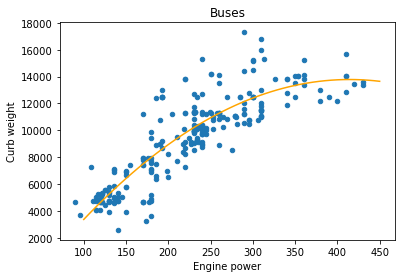

In [15]:
import numpy as np
df_bus.plot("Engine power", "Curb weight", kind="scatter")

ind = df_bus.loc[(~df_bus["Engine power"].isnull())&(~df_bus["Curb weight"].isnull()),"Engine power"]
vals = df_bus.loc[(~df_bus["Engine power"].isnull())&(~df_bus["Curb weight"].isnull()),"Curb weight"]

z = np.polyfit(ind, vals, 2)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(100, 450, 50)
y_new = f(x_new)

plt.plot(x_new, y_new,  linestyle="-", color="orange")
        
plt.title("Buses")

Text(0.5, 1.0, 'Buses: curb weight vs. gross weight')

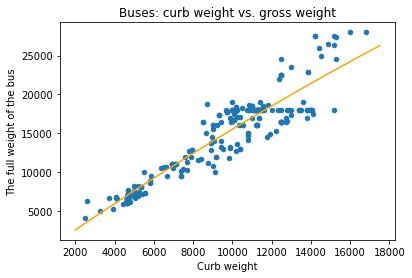

In [17]:
df_bus.plot("Curb weight", "The full weight of the bus", kind="scatter")

ind = df_bus.loc[(~df_bus["The full weight of the bus"].isnull())&(~df_bus["Curb weight"].isnull()),"Curb weight"]
vals = df_bus.loc[(~df_bus["The full weight of the bus"].isnull())&(~df_bus["Curb weight"].isnull()),"The full weight of the bus"]

z = np.polyfit(ind, vals, 2)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(2000, 17500, 50)
y_new = f(x_new)

plt.plot(x_new, y_new,  linestyle="-", color="orange")

plt.title("Buses: curb weight vs. gross weight")

In [22]:
for i,p in zip(df_heavy.count().index,
               df_heavy.count()):
    if p!= 0: print(i,p) 

Unnamed: 0 780
ID 780
Type 780
Make name 780
Model name 780
Trim 780
Amount of gear 406
Angle me to ove. lift, not less 35
Arrangement of cylinders 602
Cab type 547
Compression ratio 75
Diamètre de braquage 44
Drive wheels 559
Engine model 638
Engine power 739
Engine power at rpm 566
Engine type 696
Environmental standard 621
Front brake 107
Front track 51
Fuel 715
Fuel consumption 53
Full trailer weight 76
Gross vehicle weight 286
Ground clearance 57
Height of the tractor 197
If the rpm with rpm 1
Length of the tractor 208
Load on fifth wheel 121
Maximum speed 226
Model transmission 275
Number of cylinders 621
Potencia 644
Pressurization 409
Rear brake 105
Rear track 37
Rims, the dimension 23
The load on the front axle 215
The load on the rear axle (trolley) 190
Torque 602
Torque at rpm 555
Total train weight 225
Tractor width 202
Transmission type 468
Type front suspension 342
Type rear suspension 343
Tyre dimension 276
Wheel arrangement 92
Wheelbase 339


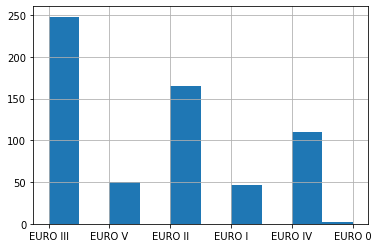

In [21]:
df_heavy["Environmental standard"].hist()

Text(0.5, 1.0, 'Trucks (incl.trailer): Driving mass vs. payload')

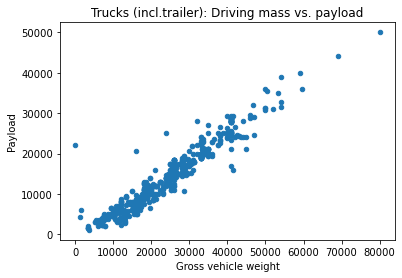

In [24]:
df_medium.plot("Gross vehicle weight", "Payload", kind="scatter")
plt.title("Trucks (incl.trailer): Driving mass vs. payload")

# Trucks

In [4]:
for i,p in zip(df_medium.count().index,
               df_medium.count()):
    if p!= 0: print(i,p) 

Unnamed: 0 2344
ID 2344
Type 2344
Make name 2344
Model name 2344
Trim 2344
Amount of gear 1363
Angle me to ove. lift, not less 402
Arrangement of cylinders 1638
Body type 1930
Cab type 1341
Compartments' 6
Compression ratio 355
Cross-section 6
Diamètre de braquage 381
Drive wheels 1578
Engine model 1642
Engine power 2106
Engine power at rpm 1561
Engine type 2036
Environmental standard 1634
Front brake 403
Front track 430
Fuel 2037
Fuel tank capacity 1
Full trailer weight 75
Gross vehicle weight 1161
Ground clearance 388
Height of loading platform 170
If the rpm with rpm 2
Length of loading platform 208
Loading height 23
Maximum speed 773
Model transmission 790
Number of cylinders 1806
Payload 835
Potencia 1918
Pressurization 1302
Pump 8
Rear brake 401
Rear track 428
Rims, the dimension 197
The height of self-suction 5
The height of the car 914
The length of the car 974
The load on the front axle 673
The load on the rear axle (trolley) 667
The tank material 6
The volume of the tank/body

Curb weight

In [10]:
df_medium = df_medium.sort_values('Gross vehicle weight')
bins =  [3000, 4000, 6000, 8000, 15000, 20000, 24000, 28000, 38000, 42000, 55000, 65000]
ind = np.digitize(df_medium['Gross vehicle weight'],bins)

Curb weight = Gross weight - payload

In [11]:
df_medium["Curb weight"] = df_medium["Gross vehicle weight"] - df_medium["Payload"]

Median and quantiles of **curb weight** by gross weight interval (3.5, 7.5, 18, 26, 40 and 60t)

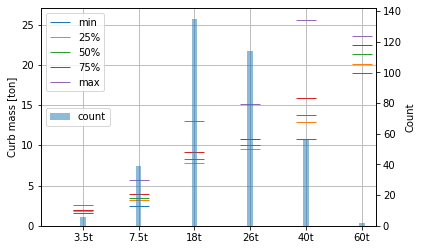

In [118]:
ax=(df_medium.groupby(ind)[["Curb weight"]].describe().iloc[[1,3, 5, 7, 9, 11]]["Curb weight"].T\
    .iloc[-5:].T/1000).plot(linewidth=0, marker="_", markersize=20)
ax.set_ylim(0,)
ax.set_xlim(-.5,11.5)
ax.grid()
ax.set_ylabel("Curb mass [ton]")
ax.set_xticks([1,3, 5, 7, 9, 11])
ax.set_xticklabels(["3.5t", "7.5t", "18t", "26t", "40t", "60t"])
#
ax1 = ax.twinx()

data = df_medium.groupby(ind)[["Curb weight"]].count().iloc[[1,3, 5, 7, 9, 11]]
ax1.bar([1,3, 5, 7, 9, 11], data["Curb weight"].values, label="count", width=.2, alpha=.5)
ax1.set_ylabel("Count")
ax1.legend(loc="center left")

In [38]:
df_medium.groupby(ind)["Curb weight"].describe().iloc[[1,3, 5, 7, 9, 11]]

,count,mean,std,min,25%,50%,75%,max
1,6.0,1970.000000,336.749165,1550.0,1850.00,1925.0,2000.00,2570.0
3,39.0,3650.897436,722.365332,2500.0,3200.00,3510.0,3900.00,5750.0
5,135.0,8259.866667,1776.983150,-4650.0,7820.00,8300.0,9200.00,13050.0
7,114.0,10128.026316,1835.826912,-1000.0,9600.00,10000.0,10800.00,15100.0
9,56.0,14588.482143,2665.561841,10780.0,12900.00,13780.0,15887.50,25500.0
11,2.0,21312.500000,3270.368863,19000.0,20156.25,21312.5,22468.75,23625.0


Power-to-mass ratio

In [64]:
df_medium["power-to-mass ratio"] = ((df_medium["Engine power"]/df_medium["Curb weight"])*1000)

In [65]:
df_medium.groupby(ind)["power-to-mass ratio"].describe().iloc[[1,3, 5, 7, 9, 11]]

,count,mean,std,min,25%,50%,75%,max
1,6.0,62.740523,22.591168,31.128405,50.000000,66.135135,70.270270,96.774194
3,37.0,38.763038,11.464745,21.217391,30.830040,38.157895,42.500000,71.633238
5,134.0,34.671471,12.829842,-49.462366,26.592292,34.683240,43.771980,63.510393
7,111.0,30.401043,35.771151,-330.000000,26.000000,29.411765,39.278351,57.066667
9,56.0,28.372121,4.876363,15.450980,25.000000,28.168024,33.048631,37.847866
11,2.0,21.678920,5.217743,17.989418,19.834169,21.678920,23.523670,25.368421


Text(0, 0.5, 'Count')

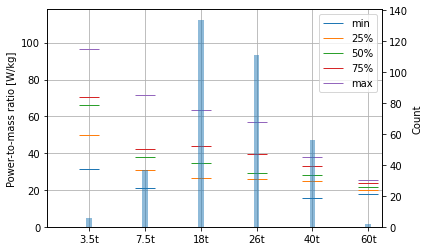

In [107]:
ax=df_medium.groupby(ind)[["power-to-mass ratio"]].describe().iloc[[1,3, 5, 7, 9, 11]]["power-to-mass ratio"].T\
    .iloc[-5:].T.plot(linewidth=0, marker="_", markersize=20)
ax.set_ylim(0,)
ax.set_xlim(-.5,11.5)
ax.grid()
ax.set_ylabel("Power-to-mass ratio [W/kg]")
ax.set_xticks([1,3, 5, 7, 9, 11])
ax.set_xticklabels(["3.5t", "7.5t", "18t", "26t", "40t", "60t"])
#
ax1 = ax.twinx()

data = df_medium.groupby(ind)[["power-to-mass ratio"]].count().iloc[[1,3, 5, 7, 9, 11]]
ax1.bar([1,3, 5, 7, 9, 11], data["power-to-mass ratio"].values, label="count", width=.2, alpha=.5)
ax1.set_ylabel("Count")

Frontal area = width * height (we assume a flat front!)

In [68]:
df_medium["frontal area"] = (df_medium["The width of the car"]*df_medium["The height of the car"]) / 1e6

In [69]:
df_medium.groupby(ind)["frontal area"].describe().iloc[[1,3, 5, 7, 9, 11]]

,count,mean,std,min,25%,50%,75%,max
1,8.0,4.427534,0.892136,3.80550,3.905288,4.088088,4.544550,6.48515
3,52.0,5.598084,0.862128,4.14904,4.982588,5.315825,6.449936,7.58740
5,171.0,7.743828,1.025424,5.63500,7.012500,7.509750,8.007000,10.96100
7,117.0,8.048134,0.697277,6.70215,7.750000,7.862500,8.237500,10.00000
9,53.0,8.108979,0.453158,6.86250,7.937500,8.045250,8.440500,8.92500
11,2.0,7.871250,0.047730,7.83750,7.854375,7.871250,7.888125,7.90500


Text(0, 0.5, 'Count')

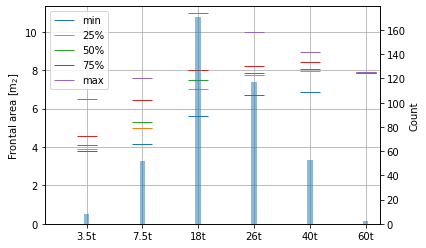

In [116]:
ax=df_medium.groupby(ind)[["frontal area"]].describe().iloc[[1,3, 5, 7, 9, 11]]["frontal area"].T\
    .iloc[-5:].T.plot(linewidth=0, marker="_", markersize=20)
ax.set_ylim(0,)
ax.set_xlim(-.5,11.5)
ax.grid()
ax.set_ylabel("Frontal area [m$_2$]")
ax.set_xticks([1,3, 5, 7, 9, 11])
ax.set_xticklabels(["3.5t", "7.5t", "18t", "26t", "40t", "60t"])
#
ax1 = ax.twinx()

data = df_medium.groupby(ind)[["frontal area"]].count().iloc[[1,3, 5, 7, 9, 11]]
ax1.bar([1,3, 5, 7, 9, 11], data["frontal area"].values, label="count", width=.2, alpha=.5)
ax1.set_ylabel("Count")

Payload

In [45]:
df_medium.groupby(ind)["Payload"].describe().iloc[[1,3, 5, 7, 9, 11]]

,count,mean,std,min,25%,50%,75%,max
1,6.0,1558.333333,278.238507,1100.0,1500.0,1575.0,1650.0,1950.0
3,39.0,3531.923077,747.184730,2100.0,3000.0,3600.0,4000.0,5000.0
5,135.0,9343.000000,2171.864200,5000.0,8010.0,9400.0,10900.0,20650.0
7,114.0,15443.289474,1983.127595,11000.0,14312.5,15000.0,16400.0,25000.0
9,56.0,25873.303571,2749.396674,15900.0,24600.0,25300.0,28100.0,29400.0
11,2.0,38000.000000,2828.427125,36000.0,37000.0,38000.0,39000.0,40000.0


In [25]:
df_medium[["Curb weight of the trailer", "Curb weight", "Curb vehicle weight", ]].sum()

Curb weight of the trailer    0.0
Curb weight                   0.0
Curb vehicle weight           0.0
dtype: float64

Fuel tank capacity

In [62]:
df_trucks[["Curb weight of the trailer", "Curb weight", "Curb vehicle weight", ]].sum()

Spec
Curb weight of the trailer    0.0
Curb weight                   0.0
Curb vehicle weight           0.0
dtype: float64

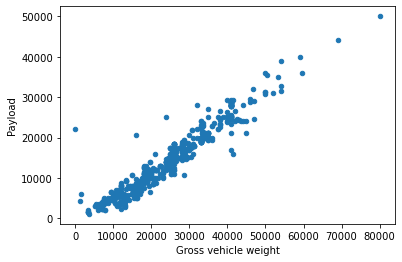

In [64]:
df_trucks.plot("Gross vehicle weight", "Payload", kind="scatter")

Text(0, 0.5, 'Count')

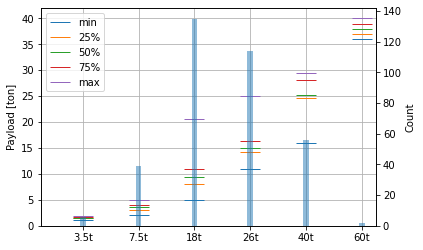

In [120]:
ax=(df_medium.groupby(ind)[["Payload"]].describe().iloc[[1,3, 5, 7, 9, 11]]["Payload"].T\
    .iloc[-5:].T/1000).plot(linewidth=0, marker="_", markersize=20)
ax.set_ylim(0,)
ax.set_xlim(-.5,11.5)
ax.grid()
ax.set_ylabel("Payload [ton]")
ax.set_xticks([1,3, 5, 7, 9, 11])
ax.set_xticklabels(["3.5t", "7.5t", "18t", "26t", "40t", "60t"])
#
ax1 = ax.twinx()

data = df_medium.groupby(ind)[["Payload"]].count().iloc[[1,3, 5, 7, 9, 11]]
ax1.bar([1,3, 5, 7, 9, 11], data["Payload"].values, label="count", width=.2, alpha=.5)
ax1.set_ylabel("Count")

In [56]:
df.loc[~df["Fuel tank capacity"].isnull(), "Fuel tank capacity"]

ID     Type           Make name  Model name  Trim
79922  Medium Trucks  Star       266         266     150.0
Name: Fuel tank capacity, dtype: float64

Text(0.5, 1.0, 'Trucks (incl.trailer): Driving mass vs. engine power')

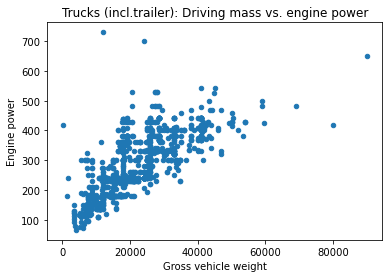

In [12]:
df_trucks.plot("Gross vehicle weight", "Engine power", kind="scatter")
plt.title("Trucks (incl.trailer): Driving mass vs. engine power")

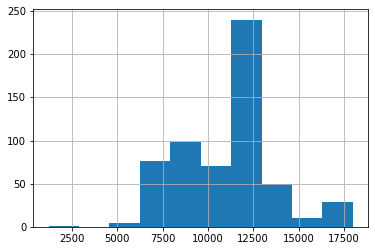

In [156]:
df_2.loc[(df_2["Type"] == "Buses")&(~df_2["Length"].isnull()),'Length'].hist()

### Trailers

In [10]:
df_trailer.loc[~df_trailer["Payload"].isnull()].to_excel("trailers.xlsx")

In [24]:
df_trailer.loc[
    ((df_trailer["Type of trailer"]=="Semitrailer curtain")
    |(df_trailer["Type of trailer"]=="Trailer side"))
    &(~df_trailer["Payload"].isnull())
]

,Unnamed: 0,ID,Type,Make name,Model name,Trim,ABS,Acceleration time to 60 km/h,Acceleration to 100 km/h,Amount of gear,...,Type steering,Tyre dimension,Useful volume,Wheel arrangement,Wheelbase,Width of loading platform,Width of the trailer,Width the cargo compartment (platform),With turnover,Volume
3193,3193,77345,Trailers,Wielton,NS,NS 3 KB-TIR,Present,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2550.0,NaN,NaN,NaN
3194,3194,77346,Trailers,Wielton,NS,NS 3 KB-Mega,Present,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2550.0,NaN,NaN,NaN
3195,3195,77347,Trailers,Wielton,NS,NS 3 KB,Present,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2550.0,NaN,NaN,NaN
3196,3196,77348,Trailers,Wielton,NS,NS 3 K-Mega 950mm,Present,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2550.0,NaN,NaN,NaN
3197,3197,77349,Trailers,Wielton,NS,NS 3 K,Present,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2550.0,NaN,NaN,NaN
3229,3229,77381,Trailers,NefAZ,Board trailers,8332,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2500.0,NaN,NaN,NaN
3328,3328,77480,Trailers,PMZ,8131,8131,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,1620.0,NaN,NaN,NaN
3350,3350,77502,Trailers,Pacton,T3,T3-001,Present,NaN,NaN,NaN,...,NaN,NaN,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3442,3442,77594,Trailers,Pronar,PC,PC2200,NaN,NaN,NaN,NaN,...,NaN,NaN,57.0,NaN,NaN,NaN,2550.0,NaN,NaN,NaN
3459,3459,77611,Trailers,Hulco,Medax,3060,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2100.0,NaN,NaN,NaN


In [21]:
df_trailer["Type of trailer"].value_counts()

Semitrailer flatbed                              122
Semitrailer tipper                               111
Semitrailer low sweep                            101
Semitrailer-tank                                  92
Trailer to a passenger car                        92
Trailer for transportation of water equipment     59
Semitrailer-container truck                       59
Trailer side                                      53
heavy-duty semitrailer                            51
Trailer tipper                                    41
Semitrailer curtain                               29
Trailer for transportation vehicles               24
Semitrailer-car carrier                           22
Trailer tent                                      21
Semitrailers-prefab                               17
Semitrailer sliding                               14
Semitrailer the refrigerator                      13
Trailer-van                                       13
A semitrailer truck                           